## Dice bingo! *fast*

#### Prompt:
Consider the following “simplified dice bingo” game. Two players each write ten numbers on a piece of paper. The numbers must be between 2 and 12 and can be repeated. For instance, you can write “3,4,5,6,7,7,9,9,10,10,10.” Now, two dice are rolled again and again, and after each roll, the sum is noted. When the sum matches one of your numbers, you cross that number off your list. (If you have that number on your list more than once, you cross it off only once.) If the sum is a number you didn’t write down or that you have already crossed off, you do nothing. Whoever crosses out all of their numbers first wins. What is the optimal strategy?

There is a one-player version of this game, where your score (lower is best) is the number of dice rolls it took for you to cross off all the numbers on your list. Use a simulation to figure out the expected score (averaging many plays of the game) of the one-player game, given a specific list of numbers. 

Numpy arrays are an example of vectorized code. That is, transformations are made in parallel to the entire array, rather than running a (slow) for loop down the entire array. This results in much faster code. 

In [1]:
import itertools as it
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get all possible numbers
nums = list(range(2, 12+1))
print(nums)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [4]:
# Get all possible combinations of those numbers
combinations = [c for c in it.combinations_with_replacement(nums, r=10)]
print(combinations[:5])  # the head
print(len(combinations))  # the length

[(2, 2, 2, 2, 2, 2, 2, 2, 2, 2), (2, 2, 2, 2, 2, 2, 2, 2, 2, 3), (2, 2, 2, 2, 2, 2, 2, 2, 2, 4), (2, 2, 2, 2, 2, 2, 2, 2, 2, 5), (2, 2, 2, 2, 2, 2, 2, 2, 2, 6)]
184756


There are 184,756 possible combinations. We're sampling with replacement where order doesn't matter. (This is the stars and bars problem.) There 11 possibilities (two through twelve), so $n = 11$ and we choose 10 for our combination, so $k = 10$. 

\begin{equation} \label{eq1}
\begin{split}
\large
{n + k - 1 \choose k} = {20 \choose 10} = 184756
\end{split}
\end{equation}

In [19]:
# Make a simulation of rolling two dice `len_sim` number of times
len_sim = 10_000
simulation = np.random.choice(range(1, 6 + 1), size=len_sim) + \
             np.random.choice(range(1, 6 + 1), size=len_sim)

print(simulation[:5])  # the head
print(len(simulation))  # the length

[ 8 12  7 12  6]
10000


In [20]:
# Get the (index) locations in the simulation of each num in `nums`
locations = [np.where(simulation == num)[0] for num in nums]

In [21]:
# `locations` is an array parallel to `nums`
assert len(locations) == len(nums)

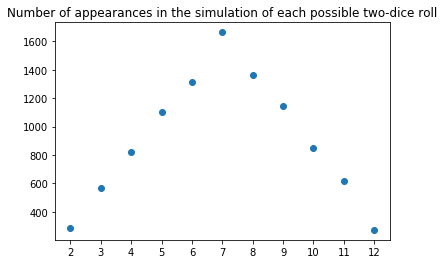

In [22]:
plt.scatter(nums, [len(locs) for locs in locations])
plt.xticks(nums)
plt.title('Number of appearances in the simulation of each possible two-dice roll')
plt.show()

In [23]:
# Get the score for each combination
scores = list()
for combination in combinations:
    combo_nums = np.unique(combination, return_counts=True)[0]
    combo_counts = np.unique(combination, return_counts=True)[1]
    enumeration = [(combo_nums[i], combo_counts[i]) for i in range(len(combo_nums))]
    score = max([locations[num - 2][count - 1] for num, count in enumeration])
    scores.append(score)

In [24]:
# `scores` is an array parallel to `combinations`
assert len(scores) == len(combinations)

We may get lucky in that the simulation has a bunch of twos or something in the beginning, this may not happen all the time. 

In [25]:
for i in np.argsort(scores)[:5]:
    print(scores[i], combinations[i])

9 (2, 3, 4, 6, 7, 7, 8, 8, 12, 12)
10 (2, 4, 6, 7, 7, 8, 8, 10, 12, 12)
10 (2, 3, 4, 7, 7, 8, 8, 10, 12, 12)
10 (3, 4, 6, 7, 7, 8, 8, 10, 12, 12)
10 (2, 3, 4, 6, 7, 7, 8, 8, 10, 12)


In [27]:
simulation[:15]

array([ 8, 12,  7, 12,  6,  8,  7,  4,  3,  2, 10,  6,  6, 10,  5])

To get a sense of what combination will perform in a new series of dice rolls, we need to run the simulation many times and see what combination does best on average.

Also note that we need not go up to 10,000 dice rolls in our simulation. The maximum score is usually less than 400 dice rolls. To be safe, lets go up to 2,000 dice rolls for each simulation.

In [28]:
print(scores[np.argsort(scores)[-1]])
print(combinations[np.argsort(scores)[-1]])

326
(12, 12, 12, 12, 12, 12, 12, 12, 12, 12)


## Run many times

In [56]:
num_simulations = 100
len_sim = 2000
N = len(combinations)
scores = np.zeros(N)

In [58]:
for simulation_num in range(num_simulations):
    print(simulation_num)
    # make simulation
    simulation = np.random.choice(range(1, 6 + 1), size=len_sim) + \
                 np.random.choice(range(1, 6 + 1), size=len_sim)
    
    # get the locations for each number
    locations = [np.where(simulation == num)[0] for num in nums]

    for i in range(N):
        combo_nums = np.unique(combinations[i], return_counts=True)[0]
        combo_counts = np.unique(combinations[i], return_counts=True)[1]
        enumeration = [(combo_nums[j], combo_counts[j]) for j in range(len(combo_nums))]
        scores[i] += max([locations[num - 2][count - 1] for num, count in enumeration])
    # end

In [60]:
scores = np.array(scores) / num_simulations

## Analysis

In [76]:
# all 7s was clearly not the best
scores[combinations.index(tuple([7] * 10))]

56.46

In [133]:
for i in np.argsort(scores)[:20]:
    print(scores[i], combinations[i])

26.63 (5, 6, 6, 7, 7, 7, 8, 8, 9, 9)
26.69 (5, 6, 6, 7, 7, 7, 8, 8, 9, 10)
26.98 (4, 5, 6, 6, 7, 7, 7, 8, 8, 9)
27.09 (5, 6, 6, 7, 7, 7, 7, 8, 8, 9)
27.14 (5, 6, 7, 7, 7, 8, 8, 9, 9, 10)
27.55 (5, 6, 7, 7, 7, 7, 8, 8, 9, 9)
27.56 (5, 6, 6, 7, 7, 8, 8, 9, 9, 10)
27.56 (5, 6, 6, 7, 7, 7, 8, 8, 8, 9)
27.63 (4, 5, 6, 7, 7, 7, 8, 8, 9, 9)
27.66 (5, 6, 7, 7, 7, 7, 8, 8, 9, 10)
27.73 (4, 5, 6, 7, 7, 7, 8, 8, 9, 10)
27.75 (5, 5, 6, 6, 7, 7, 7, 8, 8, 9)
27.76 (5, 6, 7, 7, 7, 8, 8, 8, 9, 9)
27.78 (6, 6, 7, 7, 7, 8, 8, 9, 9, 10)
27.79 (4, 5, 6, 6, 7, 7, 8, 8, 9, 9)
27.87 (5, 5, 6, 7, 7, 7, 8, 8, 9, 9)
27.88 (5, 6, 6, 6, 7, 7, 7, 8, 8, 9)
27.88 (5, 6, 6, 7, 7, 7, 8, 8, 9, 11)
28.03 (4, 5, 6, 6, 7, 7, 8, 8, 9, 10)
28.04 (5, 6, 6, 7, 7, 7, 8, 9, 9, 10)


In [130]:
best_combos = np.zeros(len(nums))
for i in np.argsort(scores)[:10000]:
    for j in range(len(nums)):
        best_combos[j] += combinations[i].count(nums[j]) / scores[i]

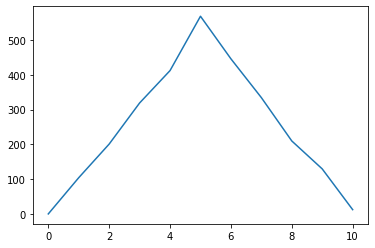

In [131]:
plt.plot(best_combos)

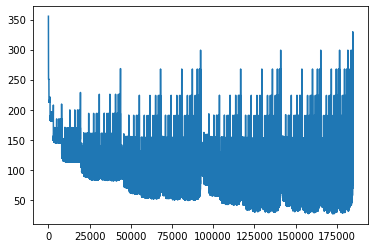

In [110]:
plt.plot(scores)

## Be more selective (don't try everything)

In [10]:
nums_short = list(range(7 - 3, 7 + 3 + 1))

In [11]:
def make_combinations(nums):
    combinations_final = list()
    combinations_simple = [c for c in it.combinations_with_replacement(nums, r=10)]
    for i in range(len(combinations_simple)):
        add = True
        for num in nums:
            max_app = 7 - abs(num - 7) - 3
            if combinations_simple[i].count(num) > max_app:
                add = False
        if add:
            combinations_final.append(combinations_simple[i])
    return combinations_final

In [12]:
import time

In [29]:
def full_simul(nums, combinations, num_simulations, len_sim):

    n = len(combinations)
    scores = np.zeros(n)
    min_num = min(nums)
    
    for simulation_num in range(num_simulations):
        if simulation_num % 500 == 0:
            print(simulation_num)
        
        # make simulation
        simulation = np.random.choice(range(1, 6 + 1), size=len_sim) + \
                     np.random.choice(range(1, 6 + 1), size=len_sim)

        # get the locations for each number
        locations = [np.where(simulation == num)[0] for num in nums]

        for i in range(n):
            combo_nums = np.unique(combinations[i], return_counts=True)[0]
            combo_counts = np.unique(combinations[i], return_counts=True)[1]
            enumeration = [(combo_nums[j], combo_counts[j]) for j in range(len(combo_nums))]
            scores[i] += max([locations[num - min_num][count - 1] for num, count in enumeration])
            
        # end simulations
    scores = np.array(scores) / num_simulations
    return scores

In [49]:
combinations_short = make_combinations(nums_short)

In [50]:
start = time.time()

In [56]:
scores_short = full_simul(nums=nums_short, combinations=combinations_short, 
                          num_simulations=1_000_000, len_sim=220)

In [52]:
stop = time.time()

In [48]:
# estimate the sim time
sim_time = 0.02162197699546814
sims = 1_000_000
(sims * sim_time) / 60 / 60  # 6 hours

6.006104720963372

In [85]:
(stop - start) / 60 / 60  # it was actually 4 hours

4.224861365556717

In [54]:
(stop - start) / 1_000_000  # 15 ms per simulation

0.015209500916004181

In [ ]:
def analyze(scores, combinations, top_num):
    for i in np.argsort(scores)[:top_num]:
        print(scores[i], combinations[i])

In [55]:
analyze(scores_short, combinations_short, 30)

27.26463 (5, 6, 6, 7, 7, 7, 8, 8, 9, 10)
27.267865 (4, 5, 6, 6, 7, 7, 7, 8, 8, 9)
27.27131 (4, 5, 6, 6, 7, 7, 8, 8, 9, 10)
27.690616 (4, 5, 6, 7, 7, 7, 8, 8, 9, 10)
27.690996 (4, 5, 6, 6, 7, 7, 7, 8, 9, 10)
28.032092 (5, 6, 6, 7, 7, 7, 8, 8, 9, 9)
28.036647 (5, 5, 6, 6, 7, 7, 7, 8, 8, 9)
28.054497 (5, 6, 6, 7, 7, 8, 8, 9, 9, 10)
28.058775 (4, 5, 6, 6, 7, 7, 8, 8, 9, 9)
28.059664 (5, 5, 6, 6, 7, 7, 8, 8, 9, 10)
28.064127 (4, 5, 5, 6, 6, 7, 7, 8, 8, 9)
28.229915 (4, 6, 6, 7, 7, 7, 8, 8, 9, 10)
28.235362 (4, 5, 6, 6, 7, 7, 7, 8, 8, 10)
28.412417 (5, 6, 6, 7, 7, 7, 8, 8, 8, 9)
28.426937 (5, 6, 6, 6, 7, 7, 7, 8, 8, 9)
28.446202 (5, 6, 6, 7, 7, 8, 8, 8, 9, 10)
28.447086 (5, 6, 7, 7, 7, 8, 8, 9, 9, 10)
28.447122 (4, 5, 6, 6, 7, 7, 8, 8, 8, 9)
28.447277 (5, 6, 6, 7, 7, 7, 8, 9, 9, 10)
28.450551 (4, 5, 6, 7, 7, 7, 8, 8, 9, 9)
28.450785 (4, 5, 6, 6, 7, 7, 7, 8, 9, 9)
28.45431 (5, 5, 6, 7, 7, 7, 8, 8, 9, 10)
28.456879 (5, 5, 6, 6, 7, 7, 7, 8, 9, 10)
28.458004 (4, 5, 5, 6, 7, 7, 7, 8, 8, 9)
28.459

## Visualize the top scoring combinations

In [61]:
import altair as alt
import pandas as pd

In [124]:
df = pd.DataFrame(combinations_short, scores_short, columns=[i + 1 for i in range(10)])
df = df.reset_index().rename(columns={"index": "score"})
df = df.sort_values(by='score').reset_index().drop(columns='index')

In [226]:
df[:10]

,score,1,2,3,4,5,6,7,8,9,10
0,27.264630,5,6,6,7,7,7,8,8,9,10
1,27.267865,4,5,6,6,7,7,7,8,8,9
2,27.271310,4,5,6,6,7,7,8,8,9,10
3,27.690616,4,5,6,7,7,7,8,8,9,10
4,27.690996,4,5,6,6,7,7,7,8,9,10
5,28.032092,5,6,6,7,7,7,8,8,9,9
6,28.036647,5,5,6,6,7,7,7,8,8,9
7,28.054497,5,6,6,7,7,8,8,9,9,10
8,28.058775,4,5,6,6,7,7,8,8,9,9
9,28.059664,5,5,6,6,7,7,8,8,9,10


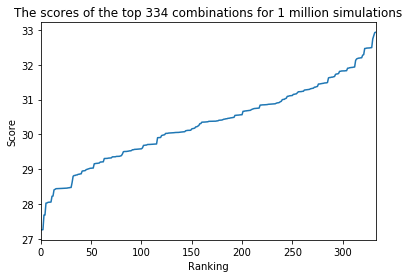

In [132]:
df['score'].plot()
plt.ylabel('Score')
plt.xlabel('Ranking')
plt.title('The scores of the top 334 combinations for 1 million simulations')
plt.show()

In [230]:
dftQ = df[:3].melt(['score'], var_name='position', value_name='roll_value')
dftQ1 = df[3:5].melt(['score'], var_name='position', value_name='roll_value')
dftO = df[:].melt(['score'], var_name='position', value_name='roll_value')

In [232]:
alt.renderers.enable('html')
circleQ = alt.Chart(dftQ).mark_circle().encode(
    y=alt.Y('score:Q', scale=alt.Scale(domain=(dftQ['score'].min() * 0.9999, \
                                               dftQ['score'].max() * 1.0001), \
                        reverse=True)),
    x='roll_value:O',
    size=alt.Size('count()', 
                  # scale=alt.Scale(type='log')
                  ),
    tooltip=['count()']
)

circleQ1 = alt.Chart(dftQ1).mark_circle().encode(
    y=alt.Y('score:Q', scale=alt.Scale(domain=(dftQ1['score'].min() * 0.9999, \
                                               dftQ1['score'].max() * 1.0001), \
                        reverse=True)),
    x='roll_value:O',
    size=alt.Size('count()', 
                  # scale=alt.Scale(type='log')
                  ),
    tooltip=['count()']
)



circleO = alt.Chart(dftO).mark_circle().encode(
    y='score:O',
    x='roll_value:O',
    size=alt.Size('count()', 
                  # scale=alt.Scale(type='log')
                  ),
    tooltip=['count()']
)


circleQ & circleQ1 & circleO

alt.VConcatChart(...)

Notice the symmetry of the top scoring combinations. That is, when there are two equivalent versions of the same combination, you tend to see the low version and the high version scoring right next to one another.

### Next step: find a closed form solution!